In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('assessment2_dataset.csv') #ensure the dataset is in your root folder where the source code file is
df.head()

,Loan_ID,Gender,Marital_Status,Number_of_Dependents,Education_Level,Independent_Worker,Applicant_Income,Coapplicant_Income,Location,Amount_Requested,Term,Credit_History,Approval_Status
0,LP00031,Male,Yes,0,Graduate,No,9329,0,Rural,189.0,180.0,1.0,Y
1,LP00032,Male,Yes,2,Graduate,No,2043,1619,Rural,102.0,360.0,1.0,Y
2,LP00033,Male,Yes,0,Graduate,No,4754,2331,Urban,129.0,360.0,1.0,Y
3,LP00034,Male,No,0,Not Graduate,No,2721,0,Urban,59.0,180.0,1.0,Y
4,LP00035,Male,Yes,0,Graduate,No,2998,3419,Semiurban,56.0,180.0,1.0,Y


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               610 non-null    object 
 1   Gender                597 non-null    object 
 2   Marital_Status        607 non-null    object 
 3   Number_of_Dependents  595 non-null    object 
 4   Education_Level       610 non-null    object 
 5   Independent_Worker    578 non-null    object 
 6   Applicant_Income      610 non-null    int64  
 7   Coapplicant_Income    610 non-null    int64  
 8   Location              610 non-null    object 
 9   Amount_Requested      592 non-null    float64
 10  Term                  596 non-null    float64
 11  Credit_History        560 non-null    float64
 12  Approval_Status       610 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.1+ KB


In [3]:
df.drop(columns=['Loan_ID'], inplace=True)

# Remove rows where Term is 12
df = df[df['Term'] != 12]


In [4]:
# Find the lowest and highest requested loan amounts
min_amount = df["Amount_Requested"].min()
max_amount = df["Amount_Requested"].max()

print("Lowest Loan Requests:")
print(min_amount)

print("\nHighest Loan Requests:")
print(max_amount)

Lowest Loan Requests:
9.0

Highest Loan Requests:
700.0


In [5]:
#identifying lowest and highest applicant income
min_income = df["Applicant_Income"].min()
max_income = df["Applicant_Income"].max()

print("Lowest Applicant Income:") 
print(min_income)

print("Highest Applicant Income:") 
print(max_income)


Lowest Applicant Income:
147
Highest Applicant Income:
81000


In [6]:
# Count missing values per column
missing_values = df.isnull().sum()
print(missing_values)

Gender                  13
Marital_Status           3
Number_of_Dependents    15
Education_Level          0
Independent_Worker      32
Applicant_Income         0
Coapplicant_Income       0
Location                 0
Amount_Requested        18
Term                    14
Credit_History          49
Approval_Status          0
dtype: int64


In [7]:
#to determine if missing values are significant

missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Gender                  2.134647
Marital_Status          0.492611
Number_of_Dependents    2.463054
Education_Level         0.000000
Independent_Worker      5.254516
Applicant_Income        0.000000
Coapplicant_Income      0.000000
Location                0.000000
Amount_Requested        2.955665
Term                    2.298851
Credit_History          8.045977
Approval_Status         0.000000
dtype: float64


In [8]:
#to determine which value to impute 

df['Credit_History'].mode()
df['Independent_Worker'].mode()


0    No
Name: Independent_Worker, dtype: object

In [9]:
#impute values

df.loc[:, 'Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df.loc[:, 'Independent_Worker'] = df['Independent_Worker'].fillna(df['Independent_Worker'].mode()[0])


In [10]:
#drop rows with <5% missing value

df.dropna(subset=['Gender', 'Marital_Status', 'Number_of_Dependents', 'Amount_Requested', 'Term'], inplace=True)

In [11]:
# Double-check missing values per column
missing_values = df.isnull().sum()
print(missing_values)

Gender                  0
Marital_Status          0
Number_of_Dependents    0
Education_Level         0
Independent_Worker      0
Applicant_Income        0
Coapplicant_Income      0
Location                0
Amount_Requested        0
Term                    0
Credit_History          0
Approval_Status         0
dtype: int64


In [12]:
#using z-score to identify outliers 

from scipy import stats

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

# Check for outliers in Applicant_Income and Amount_Requested
outliers_income_z = detect_outliers_zscore(df, 'Applicant_Income')
outliers_loan_z = detect_outliers_zscore(df, 'Amount_Requested')

print("Outliers in Applicant Income (Z-score method):\n", outliers_income_z)
print("\nOutliers in Loan Amount Requested (Z-score method):\n", outliers_loan_z)


Outliers in Applicant Income (Z-score method):
     Gender Marital_Status Number_of_Dependents Education_Level  \
69    Male             No                    1        Graduate   
256   Male            Yes                    1        Graduate   
326   Male            Yes                    0        Graduate   
401   Male            Yes                    0        Graduate   
553   Male            Yes                   3+        Graduate   
593   Male            Yes                   3+        Graduate   

    Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
69                  No             37717                   0  Semiurban   
256                 No             33846                   0  Semiurban   
326                Yes             39148                4752  Semiurban   
401                 No             63334                   0      Urban   
553                 No             39999                   0  Semiurban   
593                 No             8100

In [13]:
#comparing average values of both variables to z-score variables
mean_income = df['Applicant_Income'].mean()
std_income = df['Applicant_Income'].std()

mean_loan = df['Amount_Requested'].mean()
std_loan = df['Amount_Requested'].std()

print(f"Mean Applicant Income: {mean_income:.2f}, Std Dev: {std_income:.2f}")
print(f"Mean Loan Amount: {mean_loan:.2f}, Std Dev: {std_loan:.2f}")


Mean Applicant Income: 5351.34, Std Dev: 5970.76
Mean Loan Amount: 146.10, Std Dev: 84.13


In [14]:
#Any Applicant_Income above $23,246.32` is considered extreme (5350 + (3*5965))

upper_limit_income = mean_income + (3 * std_income)
lower_limit_income = mean_income - (3 * std_income)

extreme_income = df[(df['Applicant_Income'] > upper_limit_income) | 
                    (df['Applicant_Income'] < lower_limit_income)]
print(extreme_income)


    Gender Marital_Status Number_of_Dependents Education_Level  \
69    Male             No                    1        Graduate   
256   Male            Yes                    1        Graduate   
326   Male            Yes                    0        Graduate   
401   Male            Yes                    0        Graduate   
553   Male            Yes                   3+        Graduate   
593   Male            Yes                   3+        Graduate   

    Independent_Worker  Applicant_Income  Coapplicant_Income   Location  \
69                  No             37717                   0  Semiurban   
256                 No             33846                   0  Semiurban   
326                Yes             39148                4752  Semiurban   
401                 No             63334                   0      Urban   
553                 No             39999                   0  Semiurban   
593                 No             81000                   0      Rural   

     Amount

In [15]:
#Upper threshold: Any loan amount above $398.22 is considered extreme.

upper_limit_loan = mean_loan + (3 * std_loan)
lower_limit_loan = mean_loan - (3 * std_loan)

extreme_request = df[(df['Amount_Requested'] > upper_limit_loan) | 
                    (df['Amount_Requested'] < lower_limit_loan)]
print(extreme_request)

     Gender Marital_Status Number_of_Dependents Education_Level  \
40     Male            Yes                    1        Graduate   
88     Male            Yes                    2        Graduate   
128    Male            Yes                    0        Graduate   
136  Female            Yes                    1        Graduate   
240    Male            Yes                    2        Graduate   
313  Female            Yes                    1        Graduate   
337    Male            Yes                    0        Graduate   
401    Male            Yes                    0        Graduate   
489    Male             No                    0        Graduate   
517    Male             No                    0        Graduate   
551    Male            Yes                    0        Graduate   
553    Male            Yes                   3+        Graduate   
596    Male             No                    0        Graduate   
601    Male            Yes                   3+        Graduat

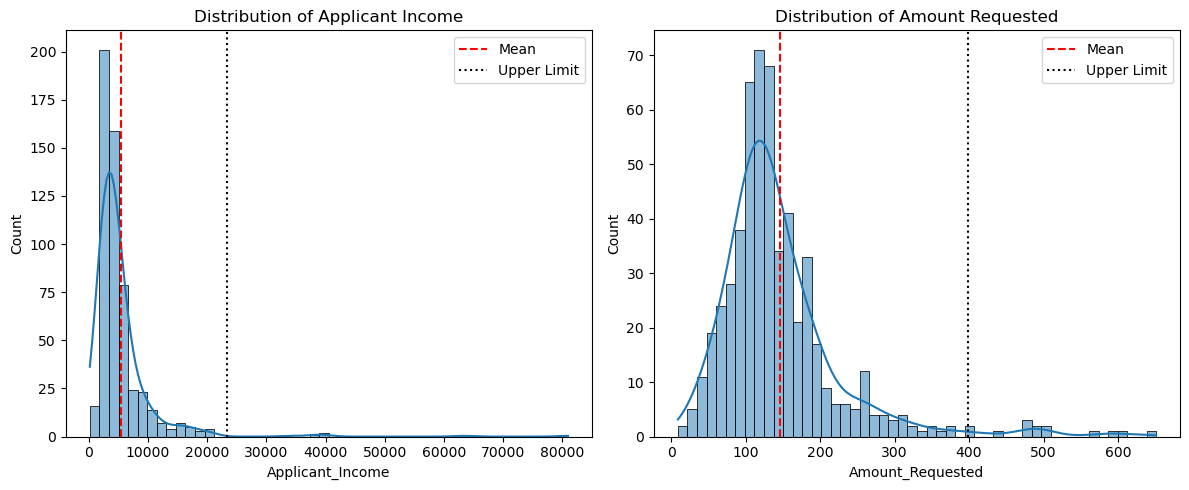

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for Applicant_Income
plt.subplot(1, 2, 1)
sns.histplot(df['Applicant_Income'], bins=50, kde=True)
plt.axvline(df['Applicant_Income'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(df['Applicant_Income'].mean() + 3*df['Applicant_Income'].std(), color='black', linestyle='dotted', label='Upper Limit')
plt.title("Distribution of Applicant Income")
plt.legend()

# Histogram for Amount_Requested
plt.subplot(1, 2, 2)
sns.histplot(df['Amount_Requested'], bins=50, kde=True)
plt.axvline(df['Amount_Requested'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(df['Amount_Requested'].mean() + 3*df['Amount_Requested'].std(), color='black', linestyle='dotted', label='Upper Limit')
plt.title("Distribution of Amount Requested")
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Define thresholds
income_threshold = 10000
loan_threshold = 400

# Filter dataset
filtered_df = df[(df['Applicant_Income'] <= income_threshold) & (df['Amount_Requested'] <= loan_threshold)]

# Check the new shape of the dataset
print(filtered_df.shape)


(503, 12)


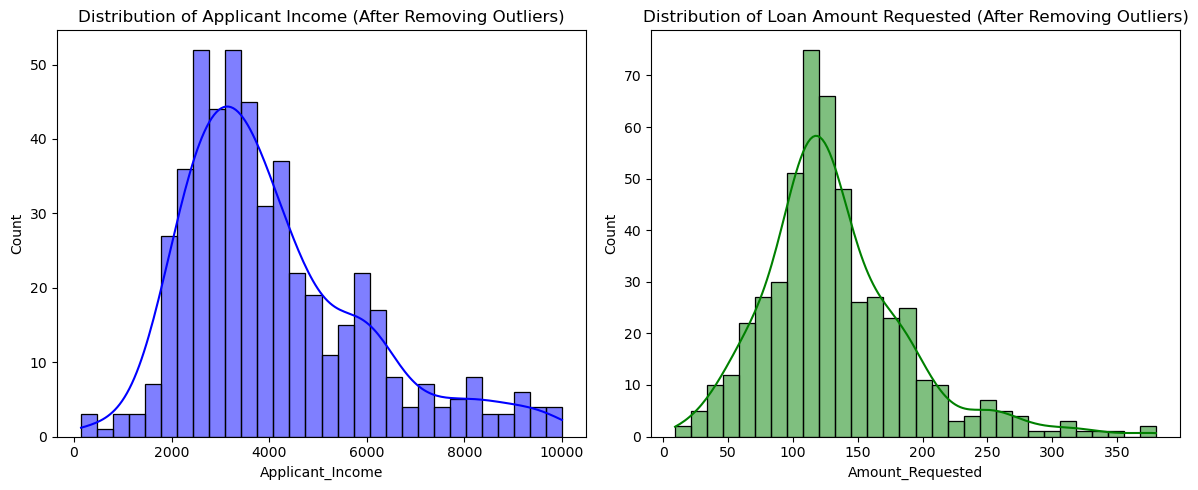

In [18]:
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for Applicant_Income
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(filtered_df['Applicant_Income'], bins=30, kde=True, color='blue')
plt.title('Distribution of Applicant Income (After Removing Outliers)')

# Histogram for Amount_Requested
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.histplot(filtered_df['Amount_Requested'], bins=30, kde=True, color='green')
plt.title('Distribution of Loan Amount Requested (After Removing Outliers)')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [19]:
#feature engineering: recoding values

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Approval_Status'] = df['Approval_Status'].map({'N': 0, 'Y': 1})
df['Location'] = df['Location'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Independent_Worker'] = df['Independent_Worker'].map({'No': 0, 'Yes': 1})
df['Education_Level'] = df['Education_Level'].map({'Non-Graduate': 0, 'Graduate': 1})
df['Marital_Status'] = df['Marital_Status'].map({'No': 0, 'Yes': 1})
df['Number_of_Dependents'] = df['Number_of_Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})


In [20]:
# Save the cleaned dataset to a new CSV file
df.to_csv('assessment2_cleaned.csv', index=False)


In [21]:
#model training 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Prepare your data
# Assuming 'df' is the DataFrame and you have a column 'Approval_Status' as your target variable
X = df.drop('Approval_Status', axis=1) 
y = df['Approval_Status'] 

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8018018018018018
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.45      0.54        29
           1       0.83      0.93      0.87        82

    accuracy                           0.80       111
   macro avg       0.76      0.69      0.71       111
weighted avg       0.79      0.80      0.79       111



In [22]:
#assign more weight to minority class, aka 0 (not approved)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reinitialize and fit the model
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)  # Refit the model on training data

# Predict on test data
y_pred = rf_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8108108108108109
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.38      0.51        29
           1       0.81      0.96      0.88        82

    accuracy                           0.81       111
   macro avg       0.80      0.67      0.70       111
weighted avg       0.81      0.81      0.79       111



In [23]:
#applying cross-validation 
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.75280899 0.73863636 0.77272727 0.77272727 0.80681818]
Mean CV accuracy: 0.7687436159346271


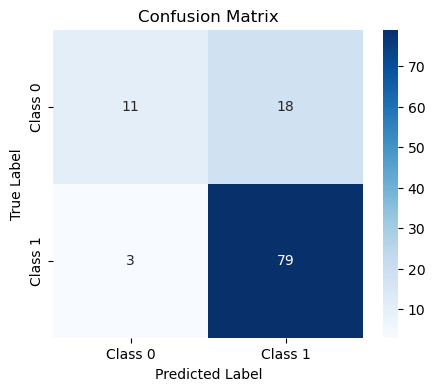

In [24]:
#importing the confusion matrix library to create one

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = rf_model.predict(X_test) 
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()